In [90]:
import cv2
import matplotlib.pyplot as plt

In [91]:
image = cv2.imread('images\Sentences\sen_1.jpg')
image_copy = image.copy()


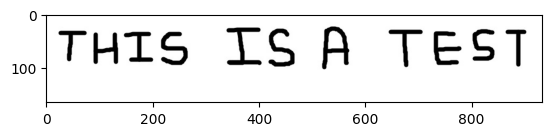

In [92]:
plt.imshow(image_copy)

In [93]:
gray = cv2.cvtColor (image_copy, cv2.COLOR_BGR2GRAY)

In [94]:
_, binary = cv2.threshold (gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

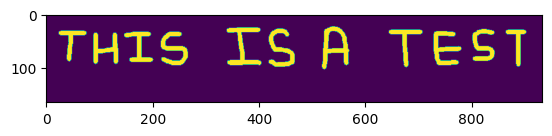

In [95]:
plt.imshow(binary)

In [96]:
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

In [97]:
for c in contours:
    print(cv2.boundingRect(c))

(24, 31, 53, 58)
(89, 35, 47, 59)
(147, 33, 55, 57)
(216, 33, 51, 63)
(340, 25, 66, 71)
(419, 27, 49, 72)
(519, 23, 52, 81)
(645, 29, 64, 71)
(729, 32, 53, 64)
(802, 28, 42, 60)
(865, 29, 39, 70)


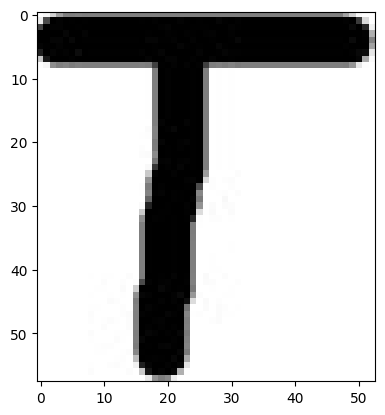

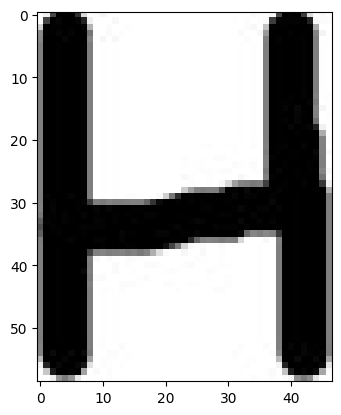

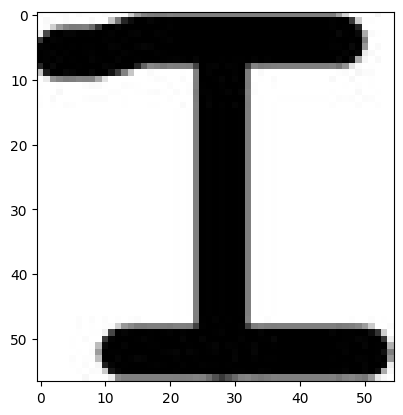

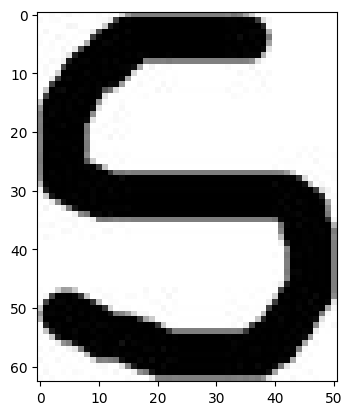

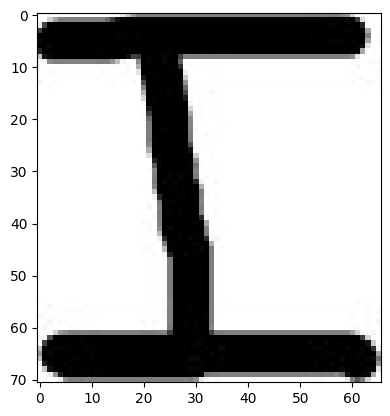

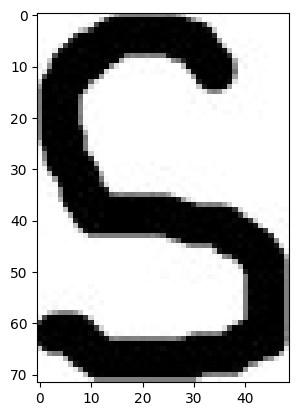

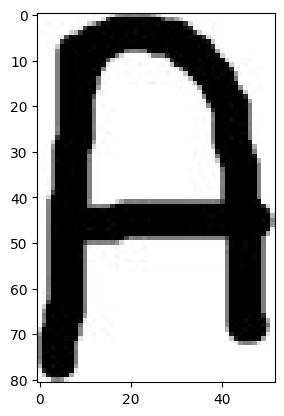

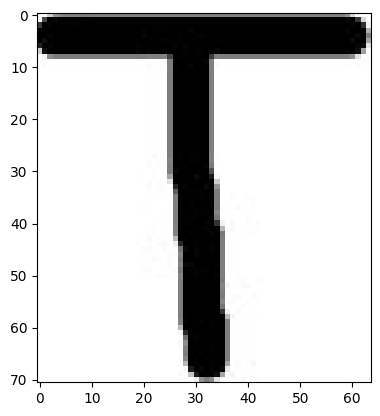

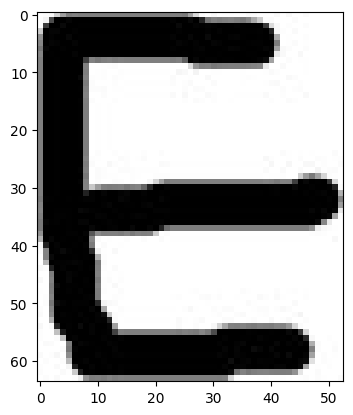

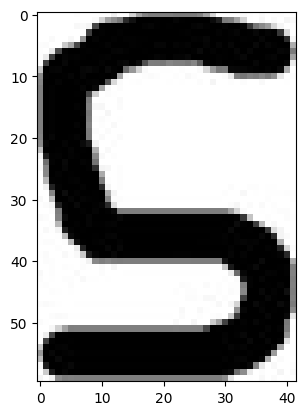

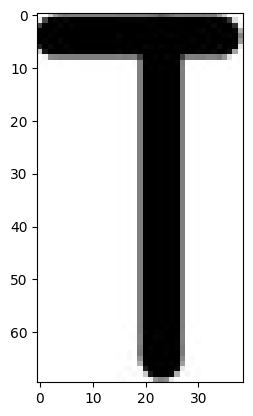

In [98]:
let_list = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    let_list.append(image_copy[y:y+h, x:x+w])

let_list

for i in let_list:
    plt.imshow(i)
    plt.show()

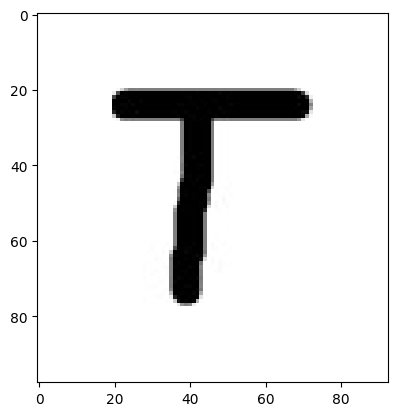

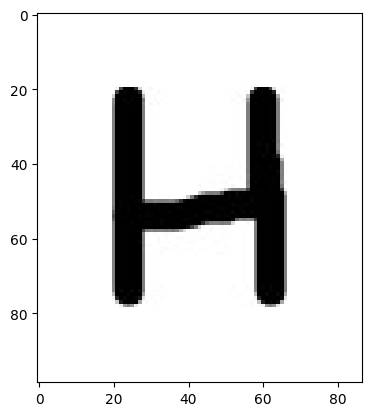

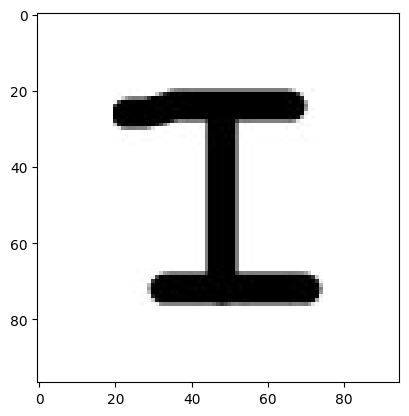

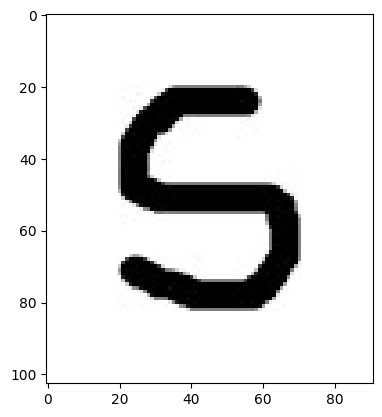

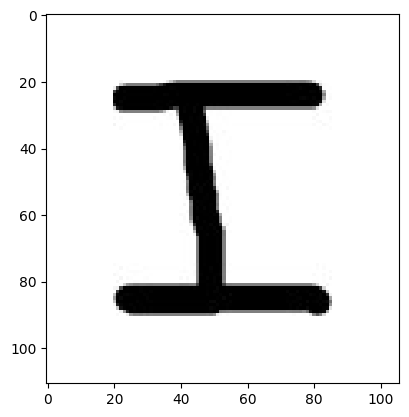

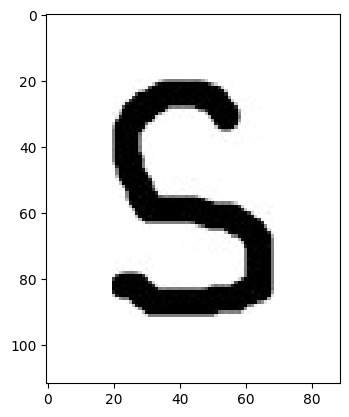

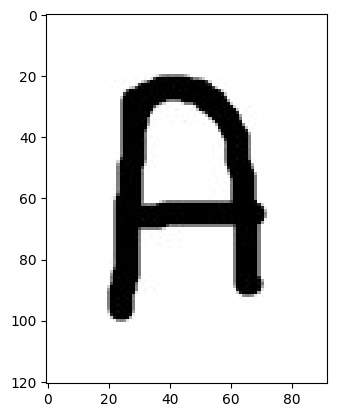

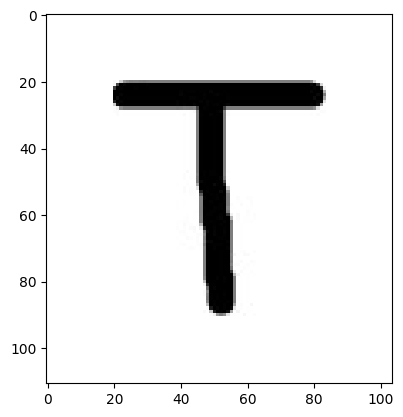

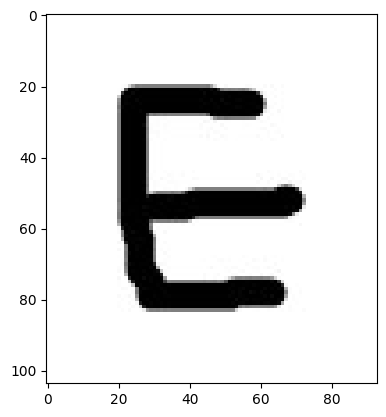

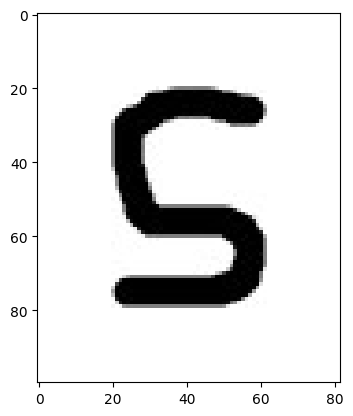

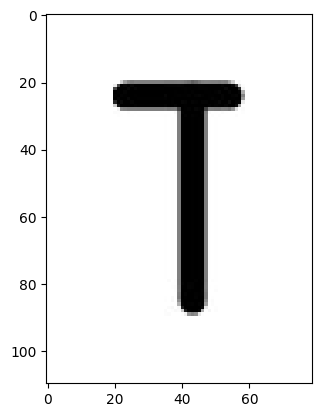

In [99]:
for letter in let_list:
    border = 20
    letter = cv2.copyMakeBorder(letter, border, border, border, border,  cv2.BORDER_CONSTANT, value=(255,255,255))
    plt.imshow(letter)
    plt.show()

word  1 :


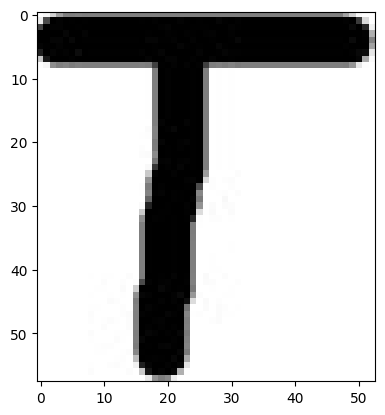

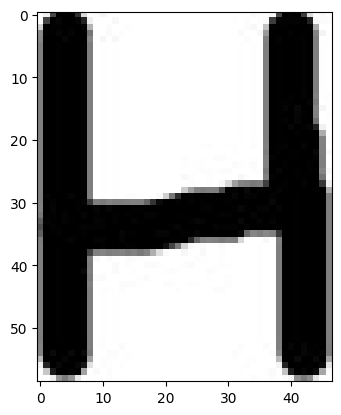

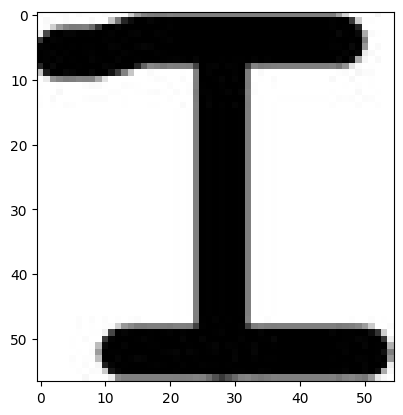

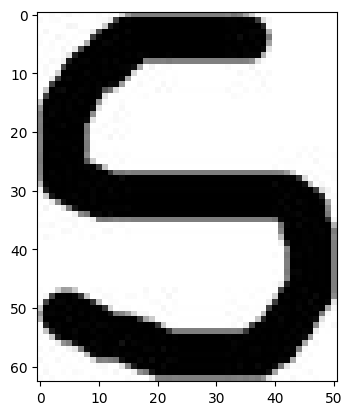

word  2 :


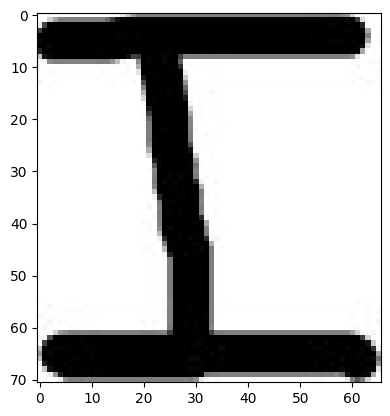

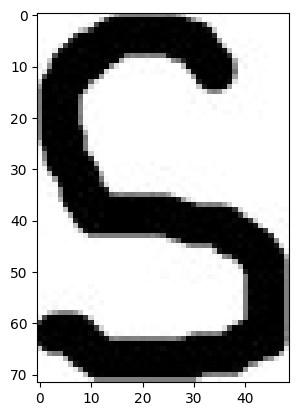

word  3 :


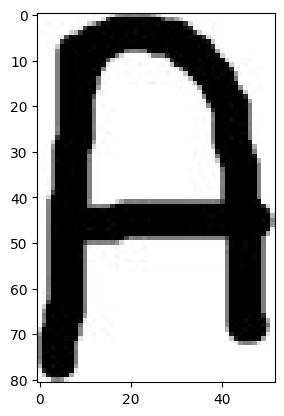

word  4 :


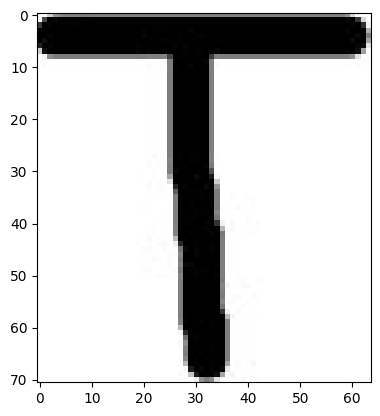

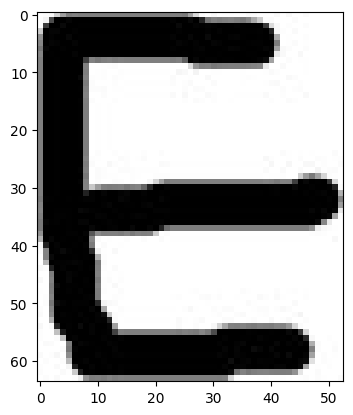

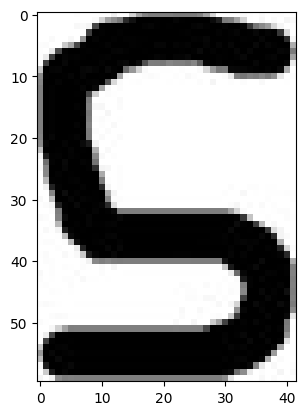

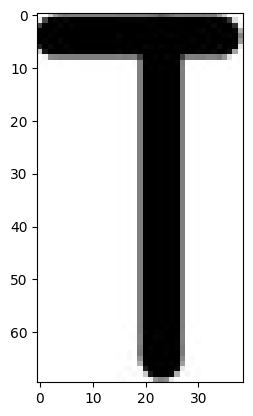

In [100]:
#word-wise splitting

max_dist = 30


sentences = []

sentence = []
word = [let_list[0]]


for i in range (1, len(let_list)):
    cur_word,_,_,_= cv2.boundingRect(contours[i])
    prev_word,_,prev_word_w,_ = cv2.boundingRect(contours[i-1])

    dist = cur_word - (prev_word+prev_word_w)

    if dist<=max_dist:
        word.append(let_list[i])
    else:
        sentence.append(word)
        word = [let_list[i]]

sentence.append(word)

for word in range(len(sentence)):
    print('word ', word+1, ':')
    for letter in sentence[word]:
        plt.imshow(letter)
        plt.show()

    

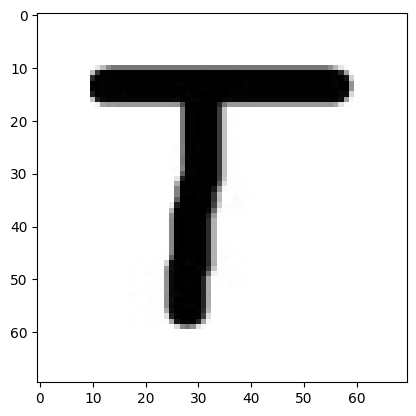

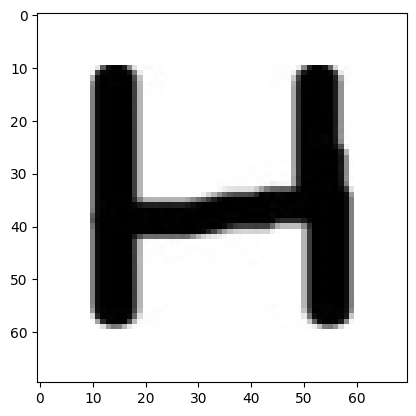

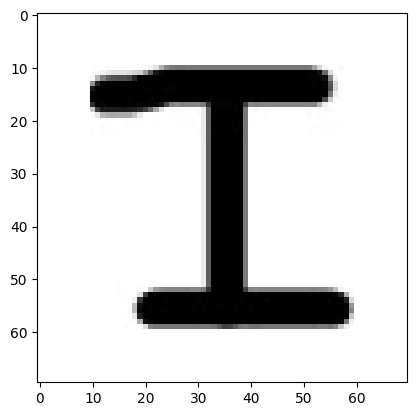

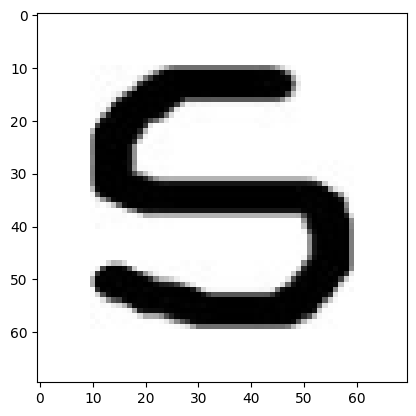

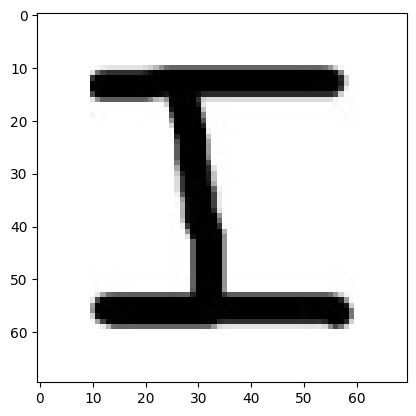

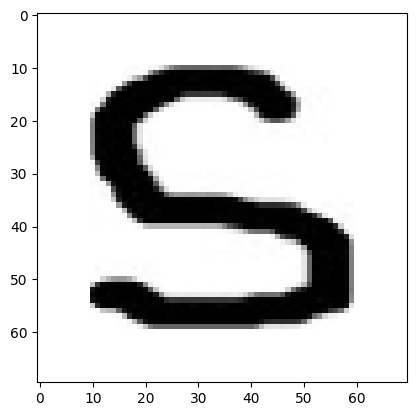

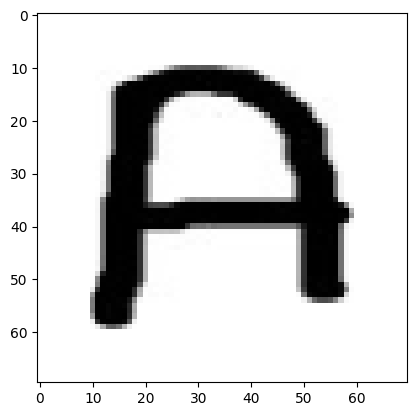

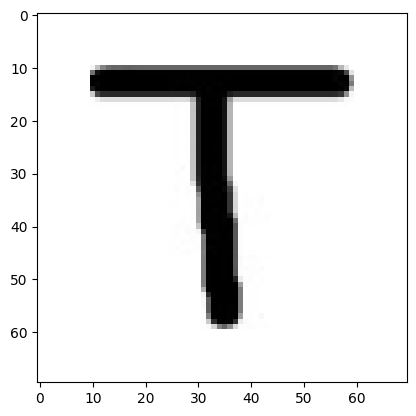

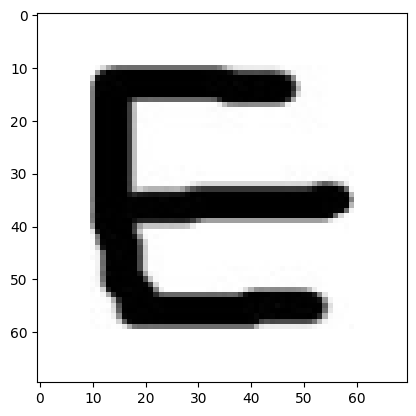

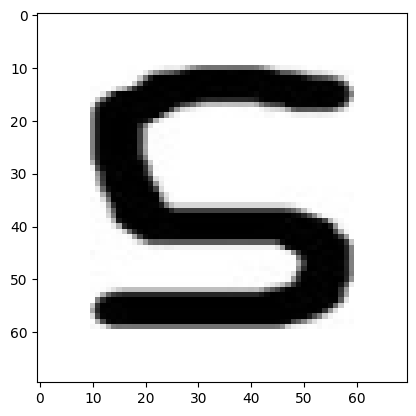

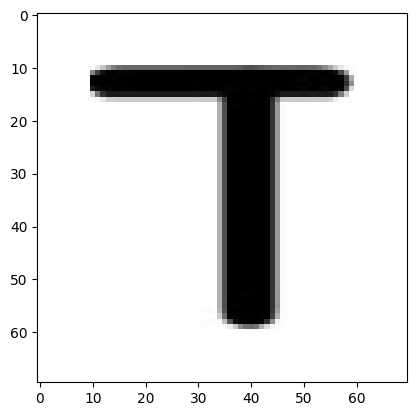

In [101]:
width = 50
height = 50


for word in sentence:
    for i in range(len(word)):
        word[i] = cv2.resize(word[i], (width, height))

        word[i] = cv2.copyMakeBorder(word[i], 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(255,255,255))
        
        plt.imshow(word[i])
        plt.show()



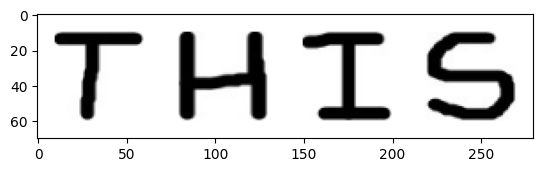

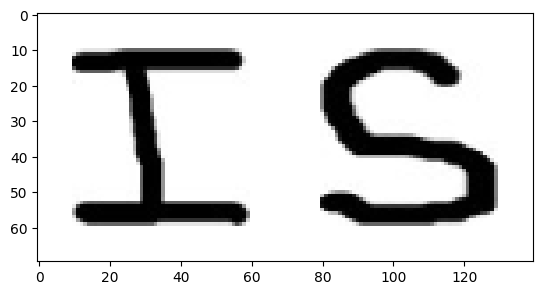

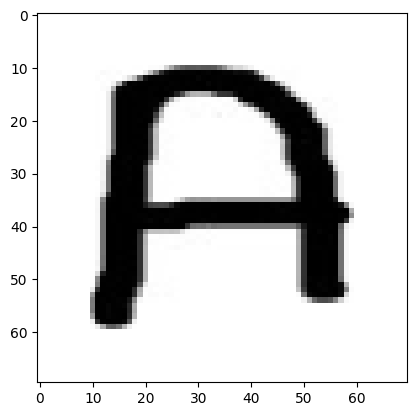

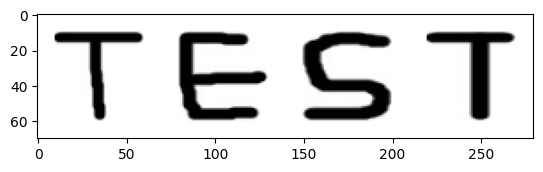

In [102]:
for word in sentence:
    indiv_word = cv2.hconcat(word)

    plt.imshow(indiv_word)
    plt.show()